#### Importing the Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings(action = 'ignore')

#### Importing the dataset

In [2]:
iris = pd.read_csv('Iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### Number of different values in the dataset

In [3]:
iris['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

#### Shape of the Dataset

In [4]:
iris.shape

(150, 5)

In [5]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Checking for null values

In [6]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
iris['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

#### Checking and dropping duplicate values

In [8]:
iris.duplicated().sum()

3

In [9]:
iris.drop_duplicates(inplace = True)

In [10]:
x = iris.iloc[:, :-1].values
y = iris['species']

#### Independent variable dataset in form of array

In [11]:
for i in range(5):
    print(x[i])

[5.1 3.5 1.4 0.2]
[4.9 3.  1.4 0.2]
[4.7 3.2 1.3 0.2]
[4.6 3.1 1.5 0.2]
[5.  3.6 1.4 0.2]


#### Dependent variable dataset in form of array

In [12]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 147, dtype: object

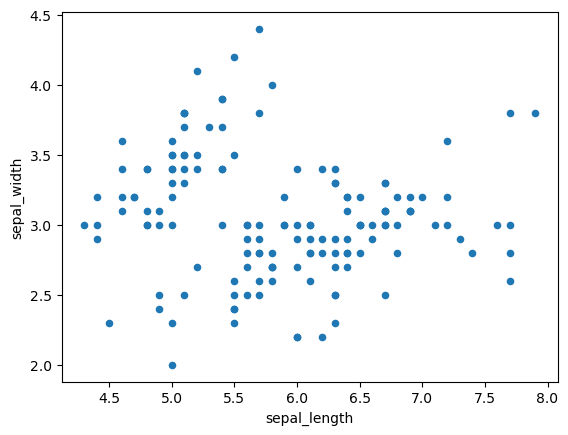

In [13]:
iris.plot(kind='scatter',x='sepal_length',y='sepal_width')
plt.show()

#### How are the length and width are distributed

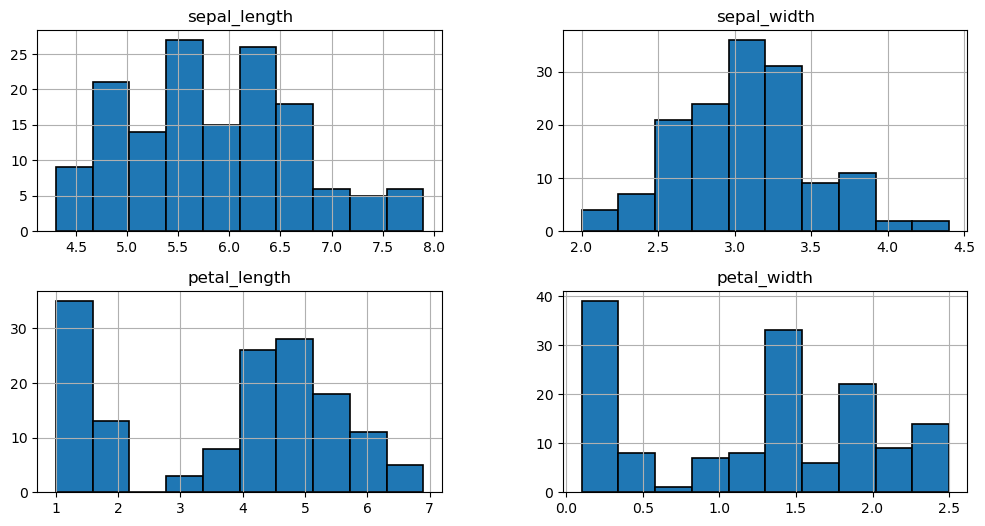

In [14]:
iris.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

#### Observations

- Using sepal length and sepal width we can distinguish setosa class from others:
- Seperating versicolor from verginica is much harder then they considered overlaps.

#### Observations

- Patel length and patel width are vary usefull features to identify various flower types
- While can be easily identify (linearly seprable) versicolor and virginica have some overlaps
- But they are almost linearly seprable
- We can find "lines" and "if-else" conditions to buid a simple model to classify the flowers types

#### 1. Relationship between species and sepal length

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

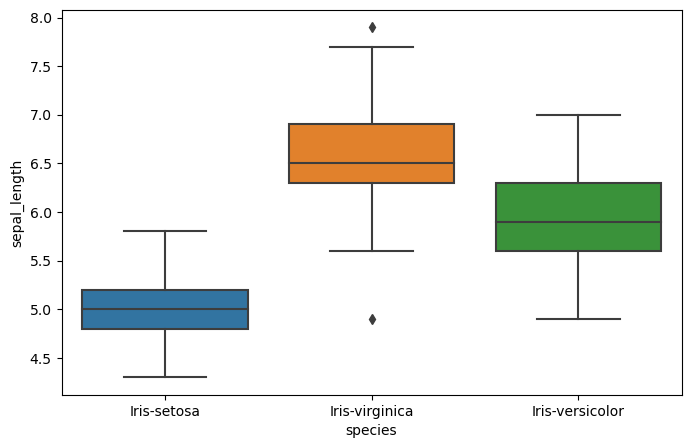

In [15]:
plt.figure(figsize=(8,5))
sns.boxplot(x='species',y='sepal_length',data=iris.sort_values('sepal_width',ascending=False))

#### 2. Relationship between species and sepal width

<AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>

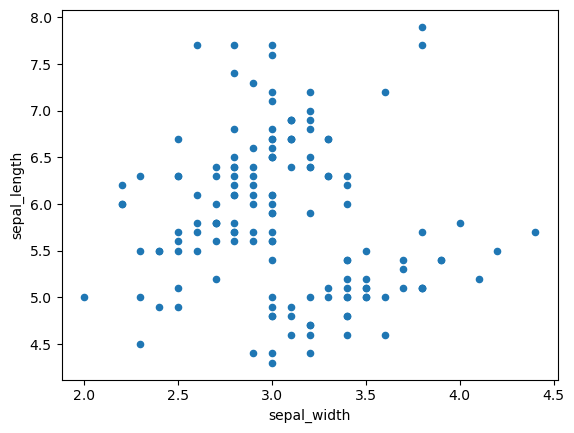

In [16]:
iris.plot(kind='scatter',x='sepal_width',y='sepal_length')

#### 4. Boxplot

array([[<AxesSubplot:title={'center':'petal_length'}, xlabel='[species]'>,
        <AxesSubplot:title={'center':'petal_width'}, xlabel='[species]'>],
       [<AxesSubplot:title={'center':'sepal_length'}, xlabel='[species]'>,
        <AxesSubplot:title={'center':'sepal_width'}, xlabel='[species]'>]],
      dtype=object)

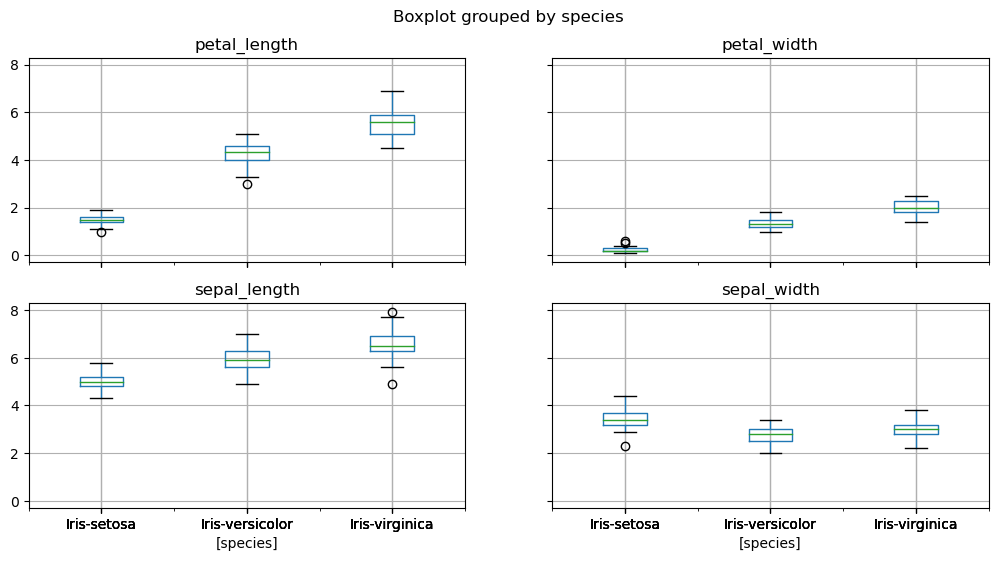

In [17]:
iris.boxplot(by="species", figsize=(12, 6))

#### 5. Andrews_curves

<AxesSubplot:>

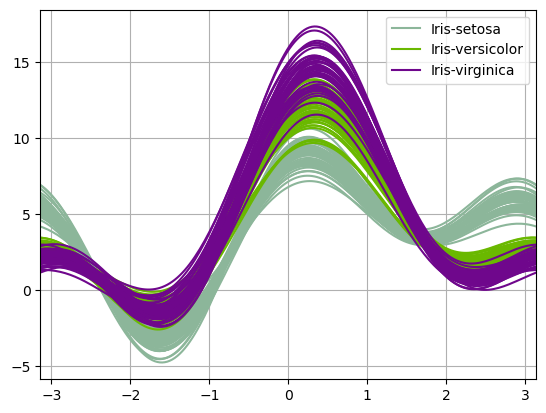

In [18]:
import pandas.plotting
from pandas.plotting import andrews_curves
andrews_curves(iris, "species")

#### 7.Violinplot

<AxesSubplot:xlabel='species', ylabel='sepal_width'>

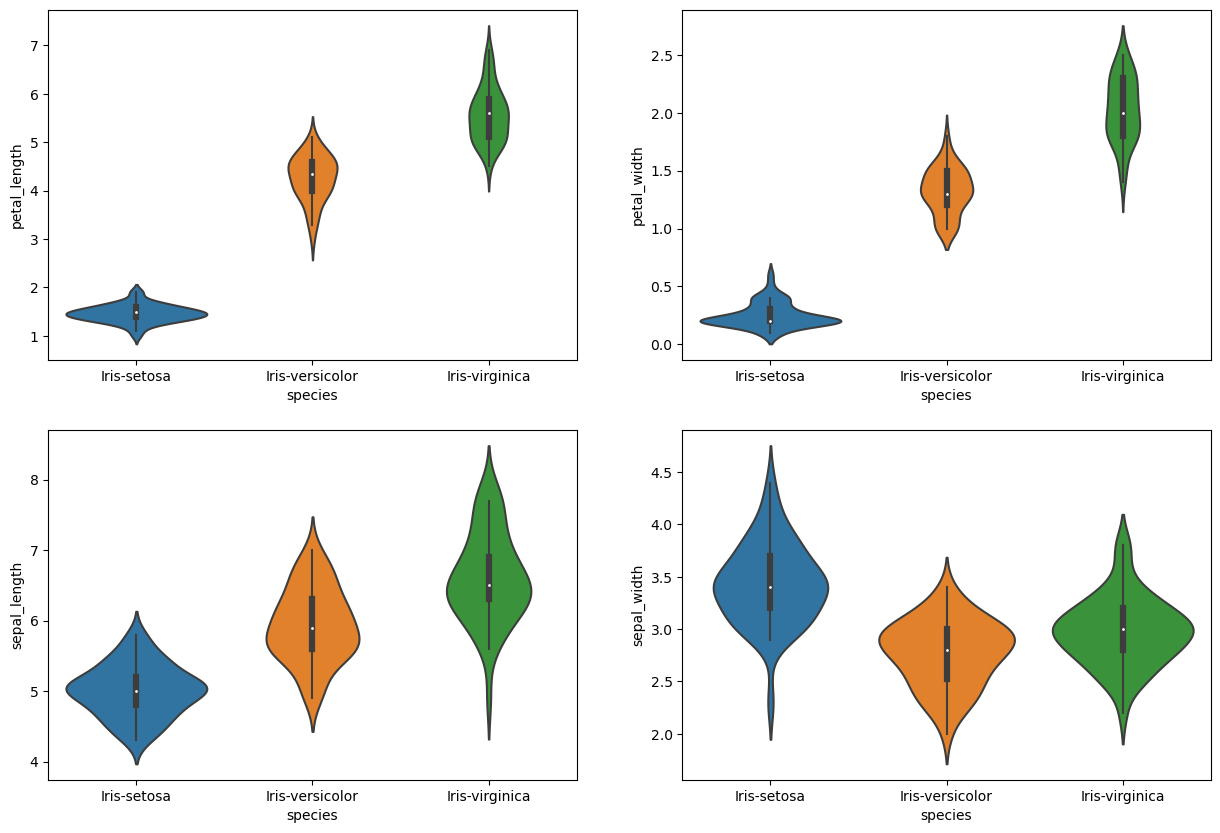

In [19]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='species',y='petal_length',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='species',y='petal_width',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='species',y='sepal_length',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='species',y='sepal_width',data=iris)

#### Splitting model into train and test set

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.20,random_state=12)

#### Applying encoding on categorical columns

In [21]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)

### Creating Logistic Regression model

In [22]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression()

#### Predicting y_test results fro trained model

In [23]:
y_pred = classifier.predict(x_test)

#### Checking accuracy of the model

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(y_test, y_pred)*100,'%')

100.0 %


In [43]:
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print the calculated scores
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 1.0
Recall: 1.0
F1 Score: 1.0


Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression')

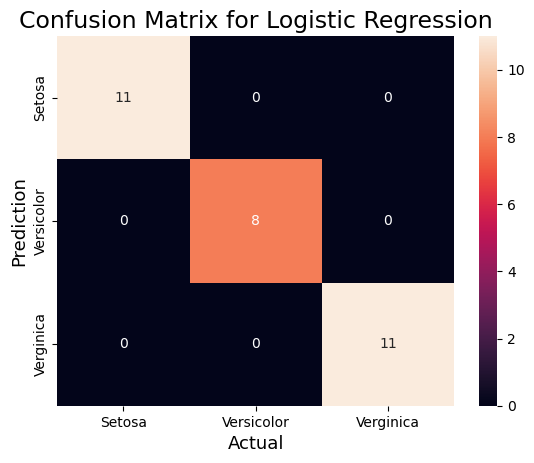

In [25]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Setosa','Versicolor', 'Verginica'],
            yticklabels=['Setosa','Versicolor', 'Verginica'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix for Logistic Regression',fontsize=17)

#### Using cross validation to check performance of the model for all test sets

In [26]:
from sklearn.model_selection import KFold, cross_val_score
k_folds = KFold(n_splits = 5)
validation = cross_val_score(classifier, x, y, cv = k_folds)
print("Cross Validation Scores: ", validation)
print("Average Cross Validation Score: ", validation.mean())

Cross Validation Scores:  [1.         1.         0.86206897 0.93103448 0.82758621]
Average Cross Validation Score:  0.9241379310344827


### Creating Random Forest Classifier model

In [27]:
from sklearn.ensemble import RandomForestClassifier  
classifier2 = RandomForestClassifier(n_estimators= 4, criterion="entropy")  
classifier2.fit(x_train, y_train)  

RandomForestClassifier(criterion='entropy', n_estimators=4)

#### Predicting y_test results fro trained model

In [28]:
y_pred2 = classifier2.predict(x_test)

#### Checking accuracy of the model

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(y_test, y_pred2)*100,'%')

93.33333333333333 %


In [44]:
precision = precision_score(y_test, y_pred2, average='macro')
recall = recall_score(y_test, y_pred2, average='macro')
f1 = f1_score(y_test, y_pred2, average='macro')

# Print the calculated scores
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.9333333333333332
Recall: 0.9393939393939394
F1 Score: 0.9296296296296296


Text(0.5, 1.0, 'Confusion Matrix for Random Forest Classifier')

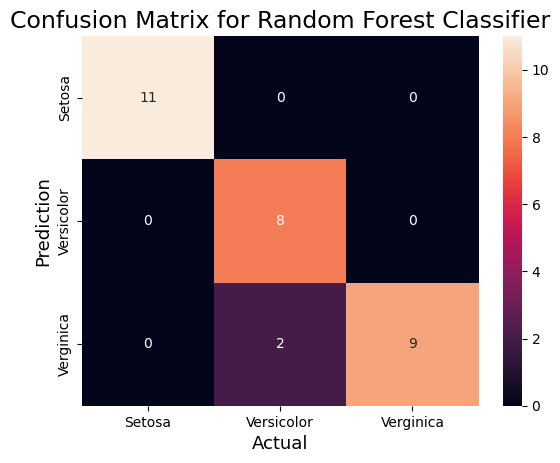

In [30]:
cm = confusion_matrix(y_test, y_pred2)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Setosa','Versicolor', 'Verginica'],
            yticklabels=['Setosa','Versicolor', 'Verginica'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix for Random Forest Classifier',fontsize=17)

#### Using cross validation to check performance of the model for all test sets

In [31]:
k_folds2 = KFold(n_splits = 5)
validation2 = cross_val_score(classifier2, x, y, cv = k_folds2)
print("Cross Validation Scores: ", validation2)
print("Average Cross Validation Score: ", validation2.mean())

Cross Validation Scores:  [1.         1.         0.82758621 0.93103448 0.72413793]
Average Cross Validation Score:  0.8965517241379309


### Creating Support Vector Classifier model

In [32]:
from sklearn.svm import SVC 
classifier3 = SVC(kernel='linear', random_state=0)  
classifier3.fit(x_train, y_train)  

SVC(kernel='linear', random_state=0)

#### Predicting y_test results fro trained model

In [33]:
y_pred3 = classifier3.predict(x_test)

#### Checking accuracy of the model

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(y_test, y_pred3)*100,'%')

100.0 %


In [45]:
precision = precision_score(y_test, y_pred3, average='macro')
recall = recall_score(y_test, y_pred3, average='macro')
f1 = f1_score(y_test, y_pred3, average='macro')

# Print the calculated scores
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 1.0
Recall: 1.0
F1 Score: 1.0


Text(0.5, 1.0, 'Confusion Matrix for Support Vector Classifier')

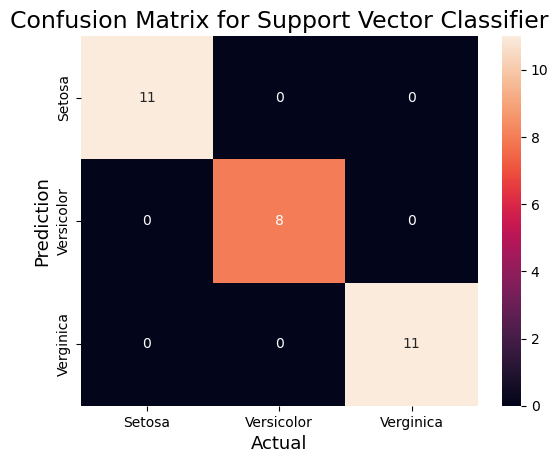

In [35]:
cm = confusion_matrix(y_test, y_pred3)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Setosa','Versicolor', 'Verginica'],
            yticklabels=['Setosa','Versicolor', 'Verginica'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix for Support Vector Classifier',fontsize=17)

#### Using cross validation to check performance of the model for all test sets

In [36]:
k_folds3 = KFold(n_splits = 5)
validation3 = cross_val_score(classifier3, x, y, cv = k_folds3)
print("Cross Validation Scores: ", validation3)
print("Average Cross Validation Score: ", validation3.mean())

Cross Validation Scores:  [1.         1.         0.86206897 1.         0.86206897]
Average Cross Validation Score:  0.9448275862068964


#### Pickling the model for Deployment

In [37]:
import pickle
filename = 'savemodel.sav'
pickle.dump(classifier3, open(filename, 'wb'))

In [38]:
load_model = pickle.load(open(filename, 'rb'))

In [39]:
load_model.predict([[6.0, 2.2, 4.0, 1.0]])

array([1])